<!--NAVIGATION-->
< [Condition 2](Condition_2.ipynb) | [Contents](Contents.ipynb) | [Combine the three conditions](Combine.ipynb) >

# 5.1 Condition 3: Wells Less than 40 Meters Deep
For the last condition we need to identify the wells that are less than 40 m deep.

`gwlevel.map` gives the absolute elevation of the groundwater level in the well in meters above sea level. In order to calculate the depth to the groundwater, we need to subtract this from the surface elevation given in the digital terrain model (`dtm.map`).

Let's first import PCRaster, change to the `data` folder and load the `showmap` function.

In [1]:
import os
from pcraster import *

print(os.getcwd())
os.chdir("./data")

/mnt/c/Users/felip/OneDrive - Universidad Nacional de Colombia/2_Formation/DataSc/2_SpatialDS/3_PrGeoHydApp/1_IHEpy4hydroapp/3_MapAlPcrtut/1_MapAlgebra


And read `gwlevel.map` and `dtm.map` from disk and use the variables `GWLevel` and `DTM` respectively. Try to do that by yourself in the next line.

In [3]:
GWLevel=readmap("gwlevel.map")
DTM = readmap("fdtm.map")


In [ ]:
#By FF
aguila(GWLevel)
aguila(DTM)

Now we can calculate the well depth by subtracting the rasters:

In [4]:
WellDepth = DTM - GWLevel

Let's visualise the result. Is it boolean, nominal or scalar?

In [6]:
aguila(WellDepth) #scalar

We can calculate a boolean raster where pixels with a well depth < 40 are True and >= 40 are False. Type the code in the next field and write the output to variable `NotDeep`.

In [7]:
NotDeep = WellDepth <=40

Visualise and save the result to `notdeep.map`.

In [8]:
aguila(NotDeep)

In [10]:
report(NotDeep, 'fnotdeep.map')

In [23]:
#Maps to Numpy
%matplotlib inline
from pcraster import *
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def showmap(pcrastermap):
    if pcrastermap.dataType() == VALUESCALE.Nominal:
        MapArray = pcr2numpy(pcrastermap,-9999)
        cmap = 'Set1'
        plt.imshow(MapArray,cmap=cmap)
        plt.colorbar()
        
    elif pcrastermap.dataType() == VALUESCALE.Boolean:
        MapArray = pcr2numpy(pcrastermap,0)
        cmap = ListedColormap(["red","green"])
        plt.imshow(MapArray,cmap=cmap,vmin=0)
        plt.colorbar(ticks=[0,1])
    else:
        MapArray = pcr2numpy(pcrastermap,-9999)
        MapArray[MapArray == -9999] = np.nan
        cmap = 'cool'
        plt.imshow(MapArray, cmap=cmap)
        plt.colorbar()
    
    plt.axis('off')
    plt.show()


#os.chdir("./data")

In [24]:
print(os.getcwd())
#os.chdir("./data")

/mnt/c/Users/felip/OneDrive - Universidad Nacional de Colombia/2_Formation/DataSc/2_SpatialDS/3_PrGeoHydApp/1_IHEpy4hydroapp/3_MapAlPcrtut/1_MapAlgebra/data


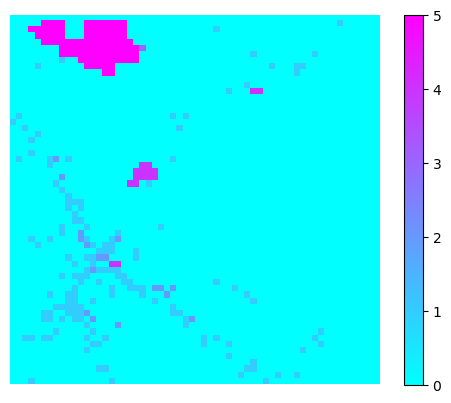

In [25]:
Build = readmap("fbuildg.map")
showmap(DTM)

<!--NAVIGATION-->
< [Condition 2](Condition_2.ipynb) | [Contents](Contents.ipynb) | [Combine the three conditions](Combine.ipynb) >